# Linear Regression

In [1]:
from si.util import summary
from si.data import Dataset
from si.data.scale import StandardScaler
from si.supervised import LinearRegression,LinearRegressionReg
import numpy as np
import os

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/lr-example1.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,mean,std,var,max,min
A,2.987301e-16,1.000000,1.00000,3.647694,-0.813765
y,5.839135e+00,5.481785,30.04997,24.147000,-2.680700


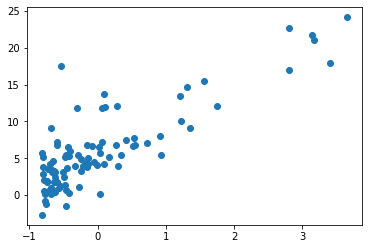

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.y)
    plt.show()


## Linear Regression using closed form 

In [4]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


In [5]:
idx = 10
x = dataset.X[idx]
print("x = ",x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.9172763535616557
y_true =  3.2522


In [6]:
lr.cost()

4.476971375975178

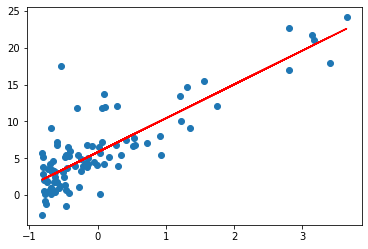

In [7]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

In [8]:
lr = LinearRegression(gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.59304113]


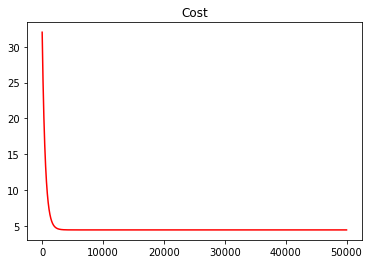

In [9]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

# Linear Regression with Regularization

In [10]:
lr = LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.54617337]


In [11]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.94709123823497
y_true =  3.2522


# Logistic Regression

In [12]:
from si.supervised import LogisticRegression, LogisticRegressionReg
import pandas as pd

In [13]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")
y = [int(x != 'Iris-setosa') for x in iris.y]
dataset = Dataset(iris.X[:,:2],np.array(y))
summary(dataset)

,mean,std,var,max,min
A,5.843333,0.825301,0.681122,7.9,4.3
B,3.054000,0.432147,0.186751,4.4,2.0
y,0.666667,0.471405,0.222222,1.0,0.0


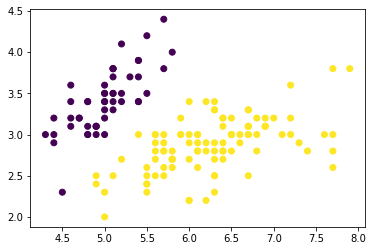

In [14]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
plt.show()

In [15]:
logreg = LogisticRegression(epochs=20000)

In [16]:
logreg.fit(dataset)
logreg.theta

array([ -6.40343083,   7.44784002, -10.92875778])

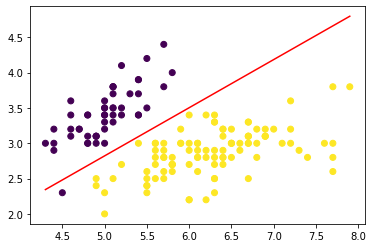

In [17]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

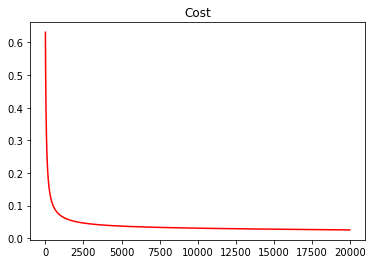

In [18]:
plt.plot(list(logreg.history.keys()), [ y[1] for y in logreg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [19]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1.0


# Logistic Regression with L2 regularization

In [20]:
logreg = LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

array([-0.00727463,  0.21345848, -0.13988809])

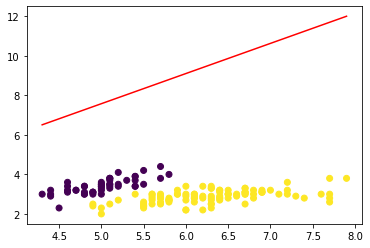

In [21]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [22]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1.0
